# Pytorch - v05 - Pima Diabetes

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within
ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Definindo a rede neural simples
class SimpleNN(nn.Module):
    # def __init__(self,input_features=8,hidden1=20, hidden2=10, out_features=2):
    def __init__(self,input_features=8,hidden1=20, hidden2=20, out_features=2):
        super(SimpleNN, self).__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)

    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

# Criando o modelo
model = SimpleNN()

# Definindo o otimizador e a função de perda
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
# optimizer = torch.optim.RMSprop(model.parameters(),lr=0.001)
loss_function = nn.CrossEntropyLoss()

In [ ]:
# class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

file = 'https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/pima-indians-diabetes.csv'

atributos = [ 'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class' ]
df = pd.read_csv(file, header=None)
df.columns = atributos
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# split into input (X) and output (Y) variables​
X = df[ ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'] ].values
y = df['class'].values
print(X[:3])
print(y[:3])

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
[1 0 1]


# Colocar X em Escala

In [ ]:
# colocar em Escala

def escala(X, mean=None, std=None):
  if mean is None:
    mean = np.mean(X)
  if std is None:
    std = np.std(X)
  X = (X - mean) / std
  return X, mean, std

def inv_escala(X, mean, std):
  X = X * std + mean
  return X

X_escala, mean, std   =  escala(X)
print('X')
print(X[:3])
print('X_escala')
print(X_escala[:3])
print('X')
print(inv_escala(X_escala, mean, std)[:3])
#print(mean, std)
print(np.mean(X_escala), np.std(X_escala), np.max(X_escala), np.min(X_escala))

X
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
X_escala
[[-0.66787402  1.7647587   0.46278626 -0.17106875 -0.77066132 -0.19505245
  -0.75992005  0.0858995 ]
 [-0.7535301   0.68549207  0.35999896 -0.27385605 -0.77066132 -0.31497097
  -0.76464826 -0.23959361]
 [-0.63361159  2.36435127  0.32573652 -0.77066132 -0.77066132 -0.37150398
  -0.75914914 -0.2224624 ]]
X
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
-6.47630097698008e-17 1.0 13.722347701656162 -0.7706613208422822


# Split (Divisão) dos dados

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2,random_state=0)

# Creating Tensors

In [ ]:
# Creating Tensors

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

# X=torch.FloatTensor(X)
# y=torch.LongTensor(y)

# Treinamento do Modelo

Epoch number: 1 and the loss : 1.8231374025344849
Epoch number: 101 and the loss : 0.6031169891357422
Epoch number: 201 and the loss : 0.5646618008613586
Epoch number: 301 and the loss : 0.5381639003753662
Epoch number: 401 and the loss : 0.5186299085617065
Epoch number: 501 and the loss : 0.49412864446640015
Epoch number: 601 and the loss : 0.47632020711898804
Epoch number: 701 and the loss : 0.461902379989624
Epoch number: 801 and the loss : 0.4497659206390381
Epoch number: 901 and the loss : 0.4349837899208069
Epoch number: 1001 and the loss : 0.4186178743839264
Epoch number: 1101 and the loss : 0.4063393175601959
Epoch number: 1201 and the loss : 0.3951978385448456
Epoch number: 1301 and the loss : 0.3856237828731537
Epoch number: 1401 and the loss : 0.3767184019088745
Epoch number: 1501 and the loss : 0.36765775084495544
Epoch number: 1601 and the loss : 0.3615218997001648
Epoch number: 1701 and the loss : 0.35653698444366455
Epoch number: 1801 and the loss : 0.349967896938324
Epo

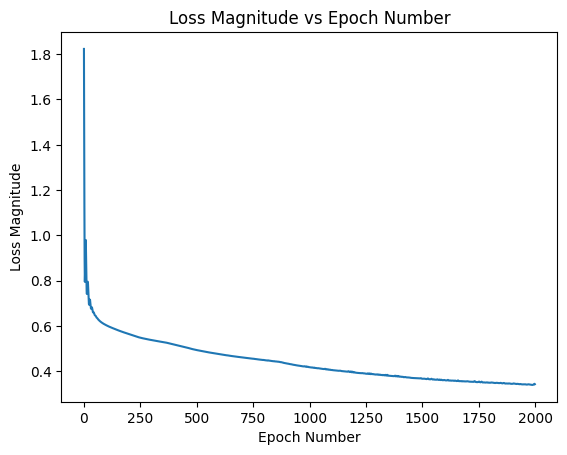

CPU times: user 3.72 s, sys: 301 ms, total: 4.02 s
Wall time: 4.24 s


In [ ]:
%%time

epochs=2000 #500
final_losses=[]
for i in range(epochs):
    i= i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i % 100 == 1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Previsões
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())


accuracy = accuracy_score(y_test,predictions)
print('\nAcurácia: ', accuracy)

cm = confusion_matrix(y_test,predictions)
print('\nMatriz de Confusão')
print(cm)

import matplotlib.pyplot as plt

losses = [ x.detach().numpy() for x in final_losses]
plt.plot(losses)
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.title("Loss Magnitude vs Epoch Number")
plt.show()

------


# Código Completo